# Buffalo Tax Roll 2021-2022 Analysis

Project by -  Deepthi D'Souza

## Part I

This project is focused on implementing the data analysis, basic machine learning methods and covering the basics of deep learning frameworks. 
In the first part,
I have worked on preprocessing, analyzing and visualizing real-world dataset - Buffalo tax roll.

### Step 1. Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix

### Step 2. Importing Real World Dataset

In [93]:
# Dataset is downloaded from website:  https://data.buffalony.gov/Economic-Neighborhood-Development/Tax-Roll-2021-2022/cqs9-nfke
tax_df = pd.read_csv("Tax_Roll_2021_-_2022.csv")

In [94]:
tax_df.head(30)

,Roll,Swis Code,Street,House Number,1st Tax Installment,2nd Tax Installment,City Tax,Local Tax,STAR Tax,School Tax,...,Description 2,Description 3,Apartment Number,Account Number,Arrears,Homestead Description,Total General Tax,Latitude,Longitude,Location
0,8,147008,ELMWOOD,1548,0.00,0.00,0.00,0,0.00,0.00,...,VARING WIDTHS TO GRANT,ON NORTH BANK,NaN,148564,NaN,NON-HOMESTEAD,0.00,NaN,NaN,NaN
1,8,147006,MAIN,1729,0.00,0.00,0.00,0,0.00,0.00,...,TO MASTEN ST TRI,NaN,NaN,148743,NaN,NON-HOMESTEAD,0.00,NaN,NaN,NaN
2,6,147003,NIAGARA MOHAWK,37,418.44,418.44,436.12,0,0.00,400.76,...,NaN,NaN,NaN,147046,NaN,NON-HOMESTEAD,836.88,NaN,NaN,NaN
3,6,147008,HERTEL,345,1377.05,1377.04,1435.22,0,0.00,1318.87,...,NaN,NaN,NaN,147359,NaN,NON-HOMESTEAD,2754.09,NaN,NaN,NaN
4,6,147003,NIAGARA MOHAWK,34,395.91,395.90,412.63,0,0.00,379.18,...,NaN,NaN,NaN,147043,NaN,NON-HOMESTEAD,791.81,NaN,NaN,NaN
5,8,147014,ABBOTT,225,0.00,0.00,0.00,0,0.00,0.00,...,TO SO SIDE PKWY,607 ON,NaN,147247,NaN,NON-HOMESTEAD,0.00,NaN,NaN,NaN
6,8,147002,BIRD ISLAND,3,0.00,0.00,0.00,0,0.00,0.00,...,& LANDS LYING BETWEEN,NaN,NaN,147013,NaN,NON-HOMESTEAD,0.00,NaN,NaN,NaN
7,8,147001,VAN RENSSELAER,11,0.00,0.00,0.00,0,0.00,0.00,...,NaN,NaN,NaN,147020,NaN,NON-HOMESTEAD,0.00,NaN,NaN,NaN
8,5,147089,SPECIAL FRANCHISE,100,1200.19,1200.18,1250.89,0,0.00,1149.48,...,NaN,NaN,NaN,147194,NaN,NON-HOMESTEAD,2400.37,NaN,NaN,NaN
9,8,147013,CITY LINE SOUTH,4,0.00,0.00,0.00,0,0.00,0.00,...,NaN,NaN,NaN,147025,NaN,NON-HOMESTEAD,0.00,NaN,NaN,NaN


### Step 3. Describe and Preprocess dataset

In [95]:
# check dimensions of the dataset
tax_df.shape

(93653, 45)

In [96]:
tax_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Roll,93653.0,1.796985e+00,2.214989e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Swis Code,93653.0,1.470083e+05,3.980485e+00,147001.000000,1.470050e+05,1.470090e+05,1.470110e+05,1.470890e+05
House Number,93653.0,3.444867e+02,1.899930e+03,0.000000,6.400000e+01,1.530000e+02,3.640000e+02,9.999900e+04
1st Tax Installment,93653.0,7.549915e+02,1.039699e+04,0.000000,7.407000e+01,2.665000e+02,6.171000e+02,2.616452e+06
2nd Tax Installment,93653.0,7.549898e+02,1.039699e+04,0.000000,7.407000e+01,2.665200e+02,6.171200e+02,2.616452e+06
City Tax,93653.0,8.223070e+02,1.083597e+04,0.000000,1.346800e+02,3.107900e+02,6.889200e+02,2.726984e+06
Local Tax,93653.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
STAR Tax,93653.0,6.824973e+01,1.408823e+02,0.000000,0.000000e+00,0.000000e+00,1.978100e+02,2.003967e+04
School Tax,93653.0,7.559240e+02,9.957474e+03,0.000000,1.314900e+02,2.911600e+02,6.339900e+02,2.505920e+06
Sewer Tax,93653.0,1.286684e+02,6.715672e+02,0.000000,2.851000e+01,5.988000e+01,1.245000e+02,7.815528e+04


### Step 4. Data Visualization

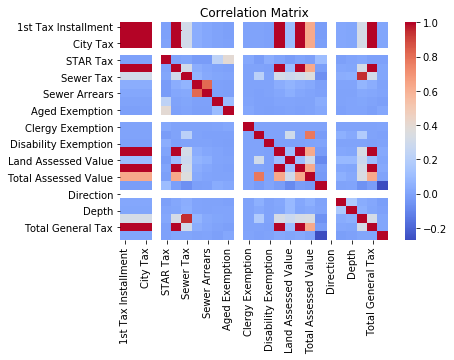

In [97]:
# Visualization 1 - plotting heatmap against numberical scaled columns
tax_corr = tax_df.drop(['Roll','House Number','Swis Code','Longitude',
                        'Apartment Number','Apartment number','Property Class','Account Number'],axis=1)
numerical_columns = tax_corr.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = tax_df[numerical_columns].corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

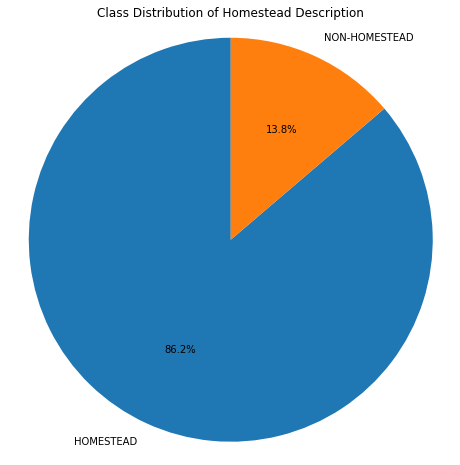

In [98]:
# Visualization 2- Class distribution using pie chart
# Calculate the count of each Homestead Description
homestead_counts = tax_df['Homestead Description'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(homestead_counts, labels=homestead_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution of Homestead Description')
plt.axis('equal')

# Display the chart
plt.show()

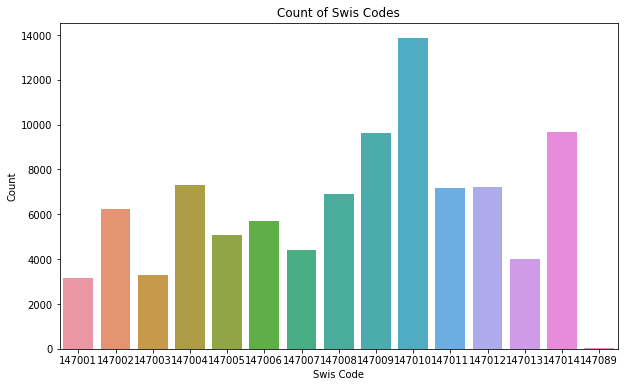

In [99]:
# Visualization 3 - Bar chart of the count of each Swis Code
plt.figure(figsize=(10, 6))
sns.countplot(data=tax_df, x='Swis Code')
plt.title('Count of Swis Codes')
plt.xlabel('Swis Code')
plt.ylabel('Count')
plt.show()

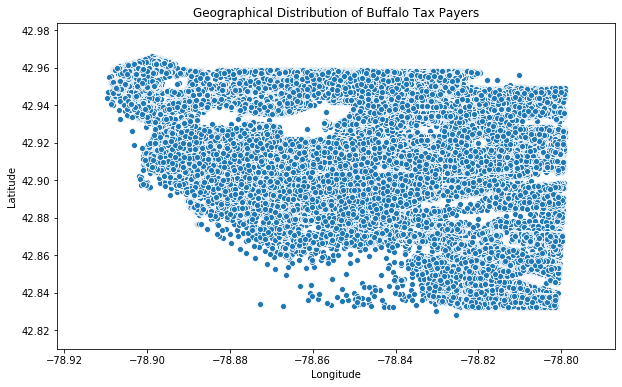

In [100]:
# Visualization 4 - Scatter plot of Latitude and Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tax_df, x='Longitude', y='Latitude')
plt.title('Geographical Distribution of Buffalo Tax Payers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<Figure size 864x432 with 0 Axes>

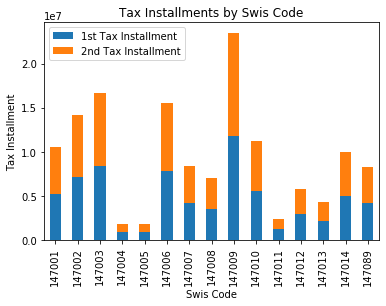

In [101]:
# Visualization 5 - Stacked bar chart of Tax Installments by Swis Code
plt.figure(figsize=(12, 6))
tax_df[['1st Tax Installment', '2nd Tax Installment']].groupby(tax_df['Swis Code']).sum().plot(kind='bar', stacked=True)
plt.title('Tax Installments by Swis Code')
plt.xlabel('Swis Code')
plt.ylabel('Tax Installment')
plt.legend(['1st Tax Installment', '2nd Tax Installment'])
plt.show()

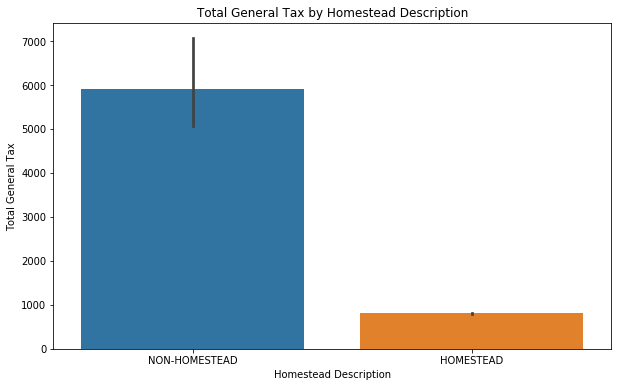

In [102]:
# Visualization 6 - Bar plot of Total General Tax by Homestead Description
plt.figure(figsize=(10, 6))
sns.barplot(data=tax_df, x='Homestead Description', y='Total General Tax')
plt.title('Total General Tax by Homestead Description')
plt.xlabel('Homestead Description')
plt.ylabel('Total General Tax')
plt.show()

## Part II

In the Part II of this project, I have prepared the dataset to use them for machine learning models. I have developed 3 ML models : Logitic Regression, Decision Tree and Random Forest and compared the accuracies and other evaluation metrics of the models on unseen test dataset.

###  Step 1. Preprocess data for models

In [103]:
tax_df[tax_df.duplicated()].shape

(0, 45)

In [104]:
tax_df.drop_duplicates(inplace=True)
tax_df.shape

(93653, 45)

In [105]:
# Drop columns not required for our analysis
tax_df = tax_df.drop(["Roll","Swis Code","Street","House Number","Bill Number","Print Key","Owner1",
                     "Bank Code","Local Tax","cagedwamt","Apartment number","Property Class","Direction","Description 1",
                     "Description 2","Description 3","Apartment Number","Account Number","Arrears",
                      "Latitude","Longitude","Location","Homestead Description"],axis=1)

In [106]:
# Drop rows with NA
tax_df = tax_df.dropna()

In [107]:
# check dimensions of the dataset
tax_df.shape

(93652, 22)

In [108]:
# Check datatypes of each column
tax_df.dtypes

1st Tax Installment          float64
2nd Tax Installment          float64
City Tax                     float64
STAR Tax                     float64
School Tax                   float64
Sewer Tax                    float64
Tax Arrears                  float64
Sewer Arrears                float64
Veterans Exemption             int64
Aged Exemption                 int64
Clergy Exemption               int64
Other Exemption                int64
Disability Exemption           int64
School Tax Assessed Value      int64
Land Assessed Value            int64
City Tax Assessed Value        int64
Total Assessed Value           int64
Homestead Code                object
Frontage                     float64
Depth                        float64
Sewer Rent Assessed Value      int64
Total General Tax            float64
dtype: object

In [109]:
# Converting Categorical columsn to numeric
tax_df["Homestead Code"] = tax_df["Homestead Code"].apply(lambda x: 1 if x == 'H' else 0)
tax_df["Homestead Code"] = tax_df["Homestead Code"].astype('int')

### Step 2. Train and Test Data Split

In [110]:
# separate features and target variable
y = tax_df['Homestead Code']
X = tax_df[tax_df.columns.drop('Homestead Code')]

,1st Tax Installment,2nd Tax Installment,City Tax,STAR Tax,School Tax,Sewer Tax,Tax Arrears,Sewer Arrears,Veterans Exemption,Aged Exemption,...,Disability Exemption,School Tax Assessed Value,Land Assessed Value,City Tax Assessed Value,Total Assessed Value,Homestead Code,Frontage,Depth,Sewer Rent Assessed Value,Total General Tax
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,...,0,0,104800,0,202000,0,100.00,0.0,0,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,...,0,0,146000,0,146000,0,146.00,0.0,0,0.00
2,418.44,418.44,436.12,0.00,400.76,46.21,0.00,0.00,0,0,...,0,48619,0,48619,48619,0,0.00,0.0,48619,836.88
3,1377.05,1377.04,1435.22,0.00,1318.87,152.06,0.00,0.00,0,0,...,0,160000,160000,160000,160000,0,200.00,200.0,160000,2754.09
4,395.91,395.90,412.63,0.00,379.18,43.72,0.00,0.00,0,0,...,0,46000,0,46000,46000,0,0.00,0.0,46000,791.81
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,...,0,0,140400,0,140400,0,678.02,0.0,0,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,...,0,0,478900,0,3400000,0,0.00,0.0,0,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,...,0,0,2000,0,2000,0,30.00,20.0,0,0.00
8,1200.19,1200.18,1250.89,0.00,1149.48,0.00,0.00,0.00,0,0,...,0,139450,0,139450,139450,0,0.00,0.0,0,2400.37
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,...,0,0,0,0,10000,0,0.00,0.0,0,0.00


In [111]:
# Train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Defining common evaluation function for classification models
def evaluation(y_test, y_pred):
    AccScore = accuracy_score(y_test, y_pred, normalize=False)
    print('Accuracy Score : ', AccScore)
    print("---------------------------------------------------------------------")
    
    ClassificationReport = classification_report(y_test,y_pred,zero_division=1)
    print('Classification Report :')
    print(ClassificationReport)
    print("---------------------------------------------------------------------")
    
    ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
    print('ROCAUC Score : ', ROCAUCScore)
    print("---------------------------------------------------------------------")
    
    ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False)
    print('Zero One Loss Value : ', ZeroOneLossValue )
    print("---------------------------------------------------------------------")
    
    ConfusionMatrix=confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', ConfusionMatrix )
    print("---------------------------------------------------------------------")
    
    val = np.mat(ConfusionMatrix) 
    classnames = list(set(y_train))
    df_cm = pd.DataFrame(val, index=classnames, columns=classnames,)
    print(df_cm)
    print("---------------------------------------------------------------------")
    
    plt.figure()
    heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Model Results')
    plt.show()  

In [113]:
# defining plot function for ROC curve
def plot(y_test, y_pred):
    # Plot ROC Curve
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    area = auc(fpr, tpr)
    plt.figure(figsize=(18,5))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % area)
    plt.plot([0, 1], [0, 1],color='g', marker='_')
    plt.title('ROC Curve', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.legend(loc = 'lower right', fontsize = 12)
    plt.show()

In [114]:
# importing models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### Step 3. Model Building

### Model 1. Logistic Regression

In [115]:
log_reg = LogisticRegression()
model_lr = log_reg.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)

C:\Users\deept\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------Logistic Regression-------------------------
Accuracy Score :  18408
---------------------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2641
           1       0.98      1.00      0.99     16090

    accuracy                           0.98     18731
   macro avg       0.98      0.95      0.96     18731
weighted avg       0.98      0.98      0.98     18731

---------------------------------------------------------------------
ROCAUC Score :  0.9466030250608972
---------------------------------------------------------------------
Zero One Loss Value :  323
---------------------------------------------------------------------
Confusion Matrix:
 [[ 2367   274]
 [   49 16041]]
---------------------------------------------------------------------
      0      1
0  2367    274
1    49  16041
-----------------------------------------------

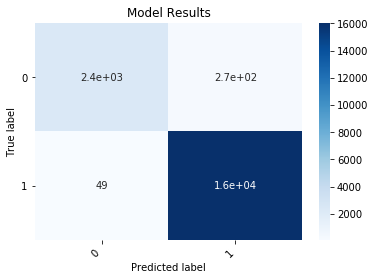

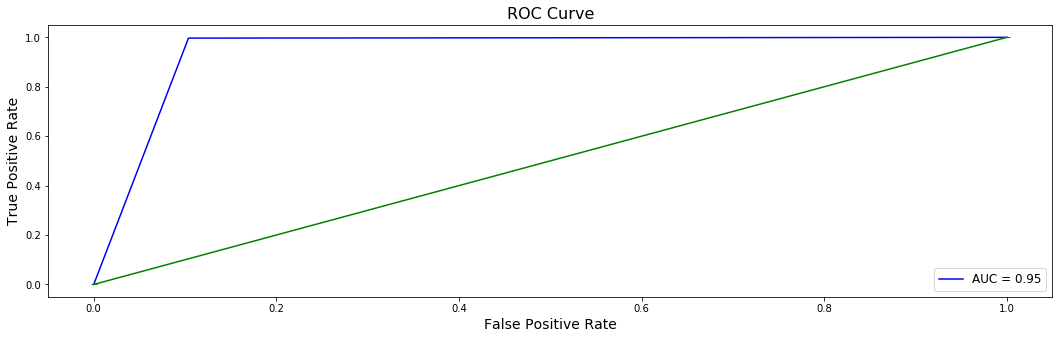

In [116]:
print("--------------------------Logistic Regression-------------------------")
evaluation(y_test,y_pred_lr)
plot(y_test,y_pred_lr)

In [117]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


### Model 2. Decision tree

In [118]:
dt = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random')
model_dt = dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

----------------------------Desicion Tree----------------------------
Accuracy Score :  18575
---------------------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2641
           1       0.99      1.00      1.00     16090

    accuracy                           0.99     18731
   macro avg       0.99      0.98      0.98     18731
weighted avg       0.99      0.99      0.99     18731

---------------------------------------------------------------------
ROCAUC Score :  0.9788528249723665
---------------------------------------------------------------------
Zero One Loss Value :  156
---------------------------------------------------------------------
Confusion Matrix:
 [[ 2538   103]
 [   53 16037]]
---------------------------------------------------------------------
      0      1
0  2538    103
1    53  16037
------------------------------------------------

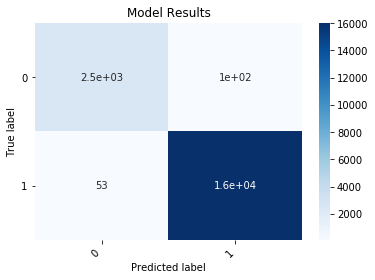

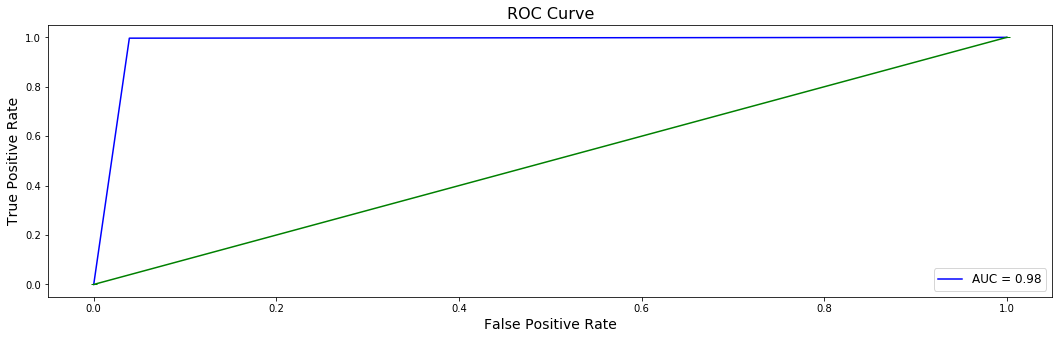

In [119]:
print("----------------------------Desicion Tree----------------------------")
evaluation(y_test,y_pred_dt)
plot(y_test,y_pred_dt)

### Model 3. RandomForest

In [120]:
rf = RandomForestClassifier(criterion='entropy')
model_rf = rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

--------------------------Random Forest------------------------------
Accuracy Score :  18613
---------------------------------------------------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2641
           1       1.00      1.00      1.00     16090

    accuracy                           0.99     18731
   macro avg       0.99      0.99      0.99     18731
weighted avg       0.99      0.99      0.99     18731

---------------------------------------------------------------------
ROCAUC Score :  0.9852558344544802
---------------------------------------------------------------------
Zero One Loss Value :  118
---------------------------------------------------------------------
Confusion Matrix:
 [[ 2571    70]
 [   48 16042]]
---------------------------------------------------------------------
      0      1
0  2571     70
1    48  16042
------------------------------------------------

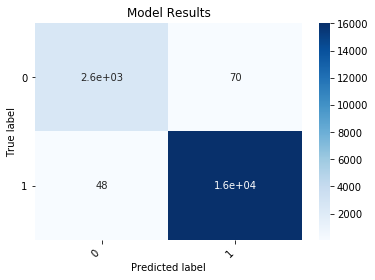

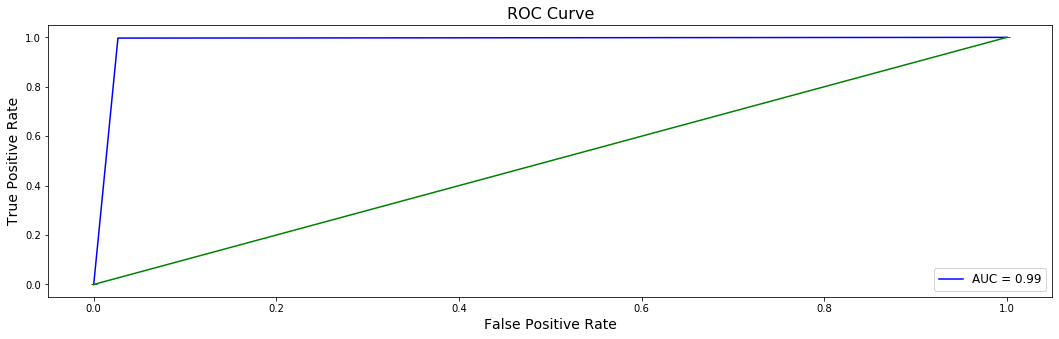

In [121]:
print("--------------------------Random Forest------------------------------")
evaluation(y_test,y_pred_rf)
plot(y_test,y_pred_rf)

### References

Decision Tree:   
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  
    
Random forest:   
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html   
    
Matplotlib:   
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html  
    
Evaluate Classification Model:    
https://builtin.com/data-science/evaluating-classification-models   

